In [27]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import copy
# Load library
from clustimage import Clustimage
from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import pandas as pd

PyTorch version: 2.3.0.dev20231230+rocm5.7
Torchvision version: 0.18.0.dev20231230+rocm5.7
CUDA is available: True


In [2]:
cl = Clustimage(method='pca',embedding='tsne',dirpath='./out',store_to_disk=True, dim=(256, 256), params_pca={'n_components':0.95})
cl.load(filepath='./out/backup_clustimage.pkl')
results = cl.results

[pypickle] Pickle file loaded: [./out/backup_clustimage.pkl]


[clustimage] >INFO> Load succesful!


In [22]:
cl.imread(results['img'])


[clustimage] >WARNING> Could not read: [[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]]


[]

In [44]:
# Find images
results_find = cl.find(Xnew ='mod_images/SAM_Photo_Moncouche_HD_2023_12_08_07_00_23.jpg', metric = 'euclidean', k=6, alpha=0.05)

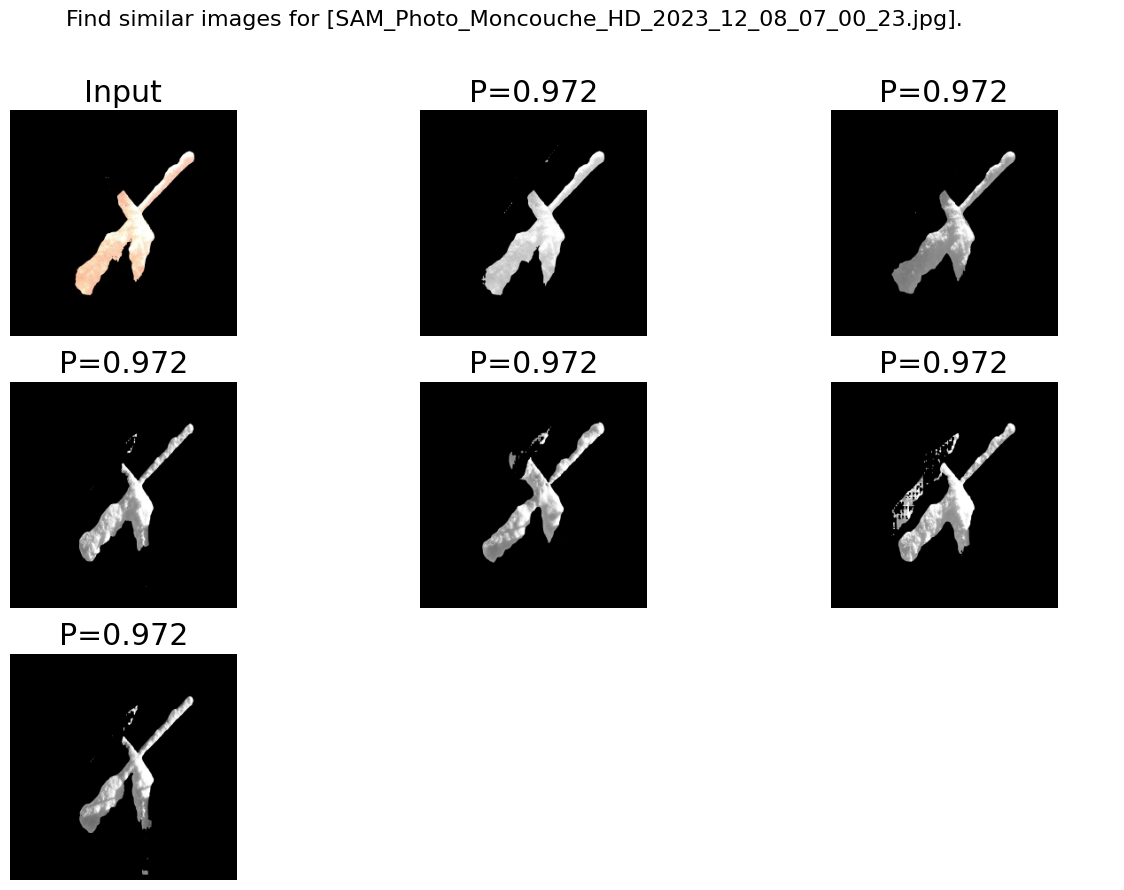

labels
 4    3
 2    2
-1    1
Name: count, dtype: int64


In [51]:
# Show whatever is found. This looks pretty good.
cl.plot_find()
# Extract the first input image name
filename = [*results_find.keys()][1]
# Extract the cluster labels for the input image
results_find[filename]['labels']

# The majority of labels is for class 0
label = pd.value_counts(results_find[filename]['labels'])
print(label)

In [53]:
percentage = label/np.sum(label)

In [54]:
print(percentage)

labels
 4    0.500000
 2    0.333333
-1    0.166667
Name: count, dtype: float64


# Find centroid

i) for each cluster, find the centroid

ii) for each cluster, find closest point from centroid 

iii) find closest image similarity index

In [59]:
classes = np.unique(results['labels'])
k = len(classes)

In [60]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [100]:
from sklearn.metrics import pairwise_distances_argmin_min
 

new_image = cv2.imread('../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_11_15_13_00_22.jpg') 
img_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    
#centroid_list = []
for i in classes:
    mask = results['labels'] == i
    points = results['xycoord'][mask]
    pics = results['pathnames'][mask]
    centroid = np.array([centeroidnp(points)])
    
    cl2, dst2 = pairwise_distances_argmin_min(centroid, points)
    print(pics[cl2][0])
    
    image = cv2.imread(str(pics[cl2][0]), cv2.COLOR_BGR2GRAY)
    cv2.imshow('fen',image)
    cv2.waitKey(0)
    #centroid_list += [[i, centroid, pics[cl2], image]]
    
    (score, diff) = compare_ssim(img_gray, image, full=True, gaussian_weights=True)
    #diff = (diff * 255).astype("uint8")
    print(f"cluster: {i}")
    print("SSIM: {}".format(score)) # expected
    

../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_06_17_03_41.jpg


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/julien/.local/lib/python3.10/site-packages/cv2/qt/plugins"


cluster: -1
SSIM: 0.8957783610166686
../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_31_10_00_22.jpg
cluster: 0
SSIM: 0.9541802199736785
../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_11_29_06_04_00.jpg
cluster: 1
SSIM: 0.6630925521638658
../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_04_09_00_21.jpg
cluster: 2
SSIM: 0.9056311559633144
../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_15_22_04_09.jpg
cluster: 3
SSIM: 0.9540507209363338
../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_21_11_00_23.jpg
cluster: 4
SSIM: 0.953072701141172


: 

In [84]:
#print(centroid_list)

[[-1, array([[44.04395549,  5.52072906]]), array(['../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_06_17_03_41.jpg'],
      dtype='<U68'), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)], [0, array([[-24.61880131, -16.15018683]]), array(['../